In [3]:
#Question 1: Implement KNN classification, using the sklearn package.

%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.datasets import load_iris

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [5]:
knn = KNeighborsClassifier(3).fit(X_train,y_train)

In [6]:
knn.score(X_test, y_test)

0.93333333333333335

In [7]:
#Question 2: Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for your cross-validation.

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import scale

from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

In [8]:
print scores
print scores.mean()

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98


In [9]:
#Question 3: Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset. Hint: This hyperparameter will be a number between 1 and 150

n_neighbors = range(1, 150, 10)
print n_neighbors

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141]


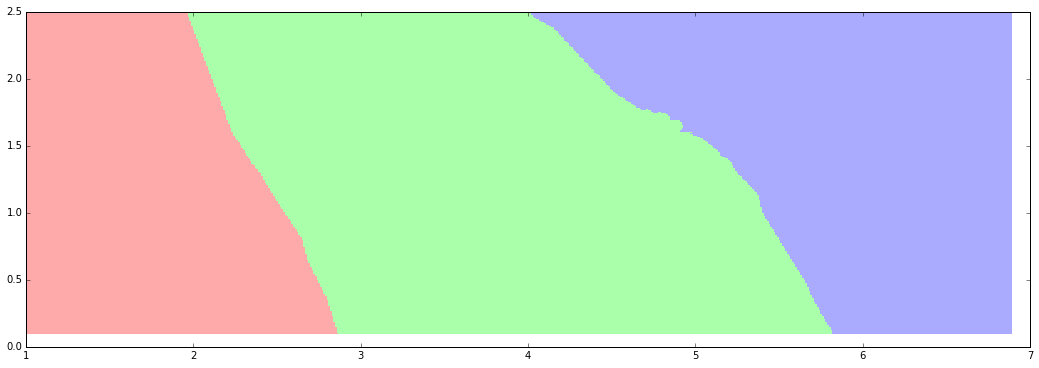

In [20]:
#Question 4: Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. Explain in words what you are seeing.

clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)


h = 0.01

# Creating color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotting the decision boundary.
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Putting the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [26]:
#Question 5: Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. Cross validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. Compare the results of your cross-validation code with your results using the cross-validation in sklearn.

import numpy as np
import pandas as pd
from pandas.io.data import DataReader
import pylab as plt
import sklearn
from sklearn.cross_validation import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['Target'] = iris.target

In [29]:
df_norm = pd.DataFrame(scale(iris.data), columns=iris.feature_names)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [32]:
def k_fold_cross_val(folds, degrees, X, y):
    n = len(X)
    kf = KFold(n, n_folds=folds)
    kf_dict = dict([("fold_%s" % i,[]) for i in range(1, folds+1)])
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        print "Fold: %s" % fold
        X_train, X_test = X.ix[train_index], X.ix[test_index]
        y_train, y_test = y.ix[train_index], y.ix[test_index]
        # Increase degree of linear regression polynomial order
        for d in range(1, degrees+1):
            print "Degree: %s" % d
            # Create the model and fit it
            polynomial_features = PolynomialFeatures(
                degree=d, include_bias=False
            )
            linear_regression = LinearRegression()
            model = Pipeline([
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression)
            ])
            model.fit(X_train, y_train)
            # Calculate the test MSE and append to the
            # dictionary of all test curves
            y_pred = model.predict(X_test)
            test_mse = mean_squared_error(y_test, y_pred)
            kf_dict["fold_%s" % fold].append(test_mse)
        # Convert these lists into numpy arrays to perform averaging
        kf_dict["fold_%s" % fold] = np.array(kf_dict["fold_%s" % fold])
    # Create the "average test MSE" series by averaging the 
    # test MSE for each degree of the linear regression model,
    # across each of the k folds.
    kf_dict["avg"] = np.zeros(degrees)
    for i in range(1, folds+1):
        kf_dict["avg"] += kf_dict["fold_%s" % i]
    kf_dict["avg"] /= float(folds)
    return kf_dict

In [33]:
def plot_test_error_curves_vs(sample_dict, random_seeds, degrees):
    fig, ax = plt.subplots()
    ds = range(1, degrees+1)
    for i in range(1, random_seeds+1):
        ax.plot(ds, sample_dict["seed_%s" % i], lw=2, label='Test MSE - Sample %s' % i)
    ax.plot(ds, sample_dict["avg"], linestyle='--', color="black", lw=3, label='Avg Test MSE')
    ax.legend(loc=0)
    ax.set_xlabel('Degree of Polynomial Fit')
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim([0.0, 4.0])
    fig.set_facecolor('white')
    plt.show()

In [35]:
def plot_test_error_curves_kf(kf_dict, folds, degrees):
    fig, ax = plt.subplots()
    ds = range(1, degrees+1)
    for i in range(1, folds+1):
        ax.plot(ds, kf_dict["fold_%s" % i], lw=2, label='Test MSE - Fold %s' % i)
    ax.plot(ds, kf_dict["avg"], linestyle='--', color="black", lw=3, label='Avg Test MSE')
    ax.legend(loc=0)
    ax.set_xlabel('Degree of Polynomial Fit')
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim([0.0, 4.0])
    fig.set_facecolor('white')
    plt.show()

In [40]:
    folds = 10
    kf_dict = k_fold_cross_val(folds, degrees, X, y)
    plot_test_error_curves_kf(kf_dict, folds, degrees)

NameError: name 'degrees' is not defined